In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from experiment_random import *
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Creating network for 10-dimensional input and 1-dimensional output, with 1 hidden layers


100%|██████████| 20/20 [00:06<00:00,  2.96it/s]


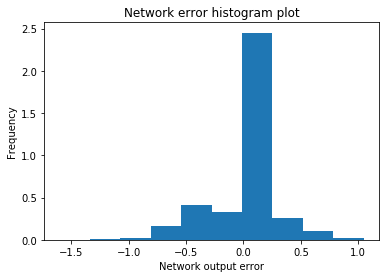

Error; maximal over inputs, average over dropout:
True values array mean: 0.146580 variance 0.237665
Experiment 0.257457 Std 0.292809
Equation   0.338652 Std 0.600216
Tightness  76.0% Std 48.8%


(0.2574569, 0.29280946, 0.3386518576715975, 0.6002162187003993, 0.23766458)

In [10]:
np.random.seed(42)
RandomExperiment(N = [10, 5, 1], P = 0.1, KLips = 0.1, do_print = True).run(inputs = 20, repetitions = 10000, do_print = True, do_plot = True, do_tqdm = True)

In [16]:
Ls = range(2, 11)
results = [RandomExperiment(P = 0.01, N = [10] * L + [1], KLips = 0.1).run(inputs = 5, do_tqdm = False, do_plot = False, do_print = False) for L in tqdm(Ls)]

100%|██████████| 9/9 [00:59<00:00,  6.64s/it]


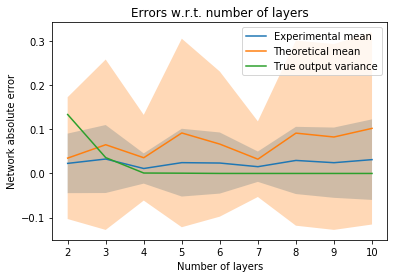

In [17]:
mean_exp, std_exp, mean_bound, std_bound, std_true = [np.array(x) for x in zip(*results)]
plt.figure()
plt.title('Errors w.r.t. number of layers')
plt.xlabel('Number of layers')
plt.ylabel('Network absolute error')
plt.plot(Ls, mean_exp, label = 'Experimental mean')
plt.fill_between(Ls, mean_exp - std_exp, mean_exp + std_exp, alpha = 0.3)
plt.plot(Ls, mean_bound, label = 'Theoretical mean')
plt.fill_between(Ls, mean_bound - std_bound, mean_bound + std_bound, alpha = 0.3)
plt.plot(Ls, std_true, label = 'True output variance')
plt.legend()
plt.show()

# Looking for the worst input

Mean error 0.36795, 84.63% from theoretical, norm 0.74
Mean error 0.38452, 88.44% from theoretical, norm 0.92
Mean error 0.40492, 93.13% from theoretical, norm 1.04
Mean error 0.42170, 96.99% from theoretical, norm 1.21
Mean error 0.44239, 101.75% from theoretical, norm 1.37
Mean error 0.44937, 103.36% from theoretical, norm 1.49
Mean error 0.46498, 106.95% from theoretical, norm 1.61
Mean error 0.46858, 107.77% from theoretical, norm 1.73
Mean error 0.47486, 109.22% from theoretical, norm 1.84
Mean error 0.48380, 111.28% from theoretical, norm 2.02
Mean error 0.48109, 110.65% from theoretical, norm 2.06
Mean error 0.48133, 110.71% from theoretical, norm 2.14
Mean error 0.48656, 111.91% from theoretical, norm 2.20
Mean error 0.48912, 112.50% from theoretical, norm 2.31
Mean error 0.49831, 114.61% from theoretical, norm 2.37
Mean error 0.49338, 113.48% from theoretical, norm 2.38
Mean error 0.48783, 112.20% from theoretical, norm 2.46
Mean error 0.49148, 113.04% from theoretical, norm 2

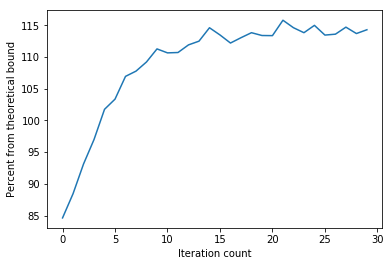

In [19]:
# Trying genetic search for x
np.random.seed(42)

# Setting parameters and creating the experiment
N = 5
L = 2
p = 0.1
K_ = 0.1
repetitions = 10000
to_add = 10
to_keep = 5
experiment = RandomExperiment([N] * L + [1], [p] * (L - 1), K_)

mean_bound, std_bound = experiment.get_mean_std_error()

# creating initial inputs
data = np.random.randn(to_keep, N)

# percents from theoretical bound
percents = []

maxiter = 30

for _ in range(maxiter):
  data_ = data

  # Randomizing inputs
  for input_ in data_:
    rand_direction = np.random.randn(to_add, N)
    rand_direction /= np.linalg.norm(rand_direction, axis = 0)
    rand_direction *= 0.5
    input_ = input_ + rand_direction
    data = np.vstack((data, input_))

  # Computing true values
  trues = [experiment.predict_no_dropout(value) for value in data]

  # Running the experiment
  errors = [experiment.get_error(value, repetitions = repetitions) for value in data]

  # List of errors for inputs
  error_array = np.mean(np.max(np.abs(errors), axis = 2), axis = 1)

  max_exp = np.max(error_array)
  
  # Choosing maximal error
  indices = np.argsort(-error_array)

  # Choosing best to_keep entries
  data = data[indices[:to_keep]]
  
  percent = 100 * max_exp / mean_bound
  print('Mean error %.5f, %.2f%% from theoretical, norm %.2f' % (max_exp, percent, np.linalg.norm(data.flatten()) / data.shape[0]))
  percents.append(percent)
  
plt.xlabel('Iteration count')
plt.ylabel('Percent from theoretical bound')
plt.plot(percents)
plt.show()